
## Multivariate Statistik und Machine Learning: Assignment 1

The exercises on this sheet are graded by a maximum of 10 points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not. 

do we need this? -> If you use any code fragments found on the Internet, make sure you reference them properly.

### Exercise 1 -- Multivariate normal distribution  (4 Points)

We know from the Lecture 2, the probability density function for multivariate normal is:

$f(x) = \frac{1}{\sqrt{(2 \pi)^d \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right) ,$ 
    
where $\mu$ is the mean, $\Sigma$ the covariance matrix, and $d$ is the dimension of the space where $x$ takes values.

#### 1.1 Implement function `multivariate_normal` that computes the probability of a point $x$ from the mean vector and the covariance matrix. Visualize then the following two bivariate normal distributions: 

(i) $ \mu_1 =  
\begin{bmatrix}
1 \\
0
\end{bmatrix}, \Sigma_1 =  
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix} $

(ii) $ \mu_2 = 
\begin{bmatrix}
0 \\
-1
\end{bmatrix},
\Sigma_2 =  
\begin{bmatrix}
9 & -2.5 \\
-2.5 & 1 
\end{bmatrix} $

You cannot use already implemented functions for `multivariate_normal` in python libraries but you can test if your implementation is correct using `scipy.stats.multivariate_normal`. 
Other helpful functions that you might need: `numpy.linalg`, `numpy.ndarray.T`

In [649]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
#import utils
import scipy.stats
%matplotlib inline

mu_1 = np.array([1,0])
cov_1 = np.array([[1,0],[0,2]])

mu_2 = np.array([0,-1])
cov_2 = np.array([[9,-2.5],[-2.5,1]])


In [650]:
def multivariate_normal(x,mean, covariance):
    """pdf of the multivariate normal distribution."""
    
    #source: from a script in Exercise 1 of the course Computational Intelligence Lab FS2020
    dim = mean.shape[0]
    factor=1/((2*np.pi)**(dim/2)*np.linalg.det(covariance)**(0.5))
    p = factor*np.exp(-0.5*np.sum(np.multiply(np.matmul((x-mean),np.linalg.inv(covariance)),(x-mean)), axis=0))

    return p

In [651]:
x = np.array([1,0])

prob = multivariate_normal(x,mu_1, cov_1)
print(prob)
lib_prob = scipy.stats.multivariate_normal.pdf(x, mu_1, cov_1)
print(lib_prob)

print('\n',multivariate_normal(x,mu_2, cov_2),scipy.stats.multivariate_normal.pdf(x, mu_2, cov_2))

0.11253953951963826
0.11253953951963827

 0.006276453109602912 0.006276453109602913


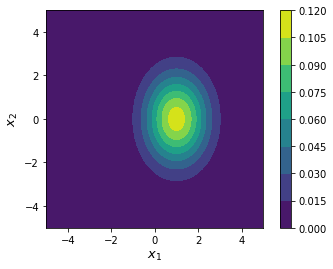

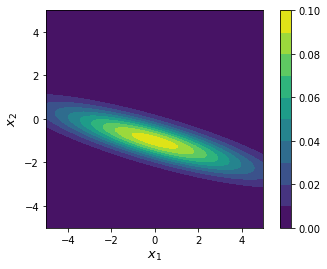

In [652]:
# visualize the two normal distribution
plot_2d_normal(mu_1,cov_1,multivariate_normal)
plot_2d_normal(mu_2,cov_2,multivariate_normal)

#### 1.2 Implement a function `marginalize_multivariate_normal` which receives as input the mean vector and the covariance matrix of a multivariate normal distribution, and the index of the dimension over which we want to compute the marginal distribution; it returns the mean and the variance of the univariate marginal distribution. Implement the function `univariate_normal` that computes the probability of a univariate normal distribution. Get the mean and variance for dimension 0 marginal of normal distribution $1$, and for dimension 1 marginal of normal distribution $2$ 

In [653]:
def marginalize_multivariate_normal(mean,cov,dim):
    """extract univariate normal distribution for dimension dim"""

    mean_univariate = mean[dim]
    var = cov[dim,dim]
    
    return mean_univariate,var
    

In [654]:
print(marginalize_multivariate_normal(mu_1, cov_1,0),'\n',marginalize_multivariate_normal(mu_1, cov_1,1))

(1, 1) 
 (0, 2)


In [655]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    # source: scipy documentation
    p = scipy.stats.norm(mean, variance).pdf(x)

    return p

In [656]:
mu_1_marginal, var_1_marginal = marginalize_multivariate_normal(mu_1,cov_1,0)
mu_2_marginal, var_2_marginal = marginalize_multivariate_normal(mu_2,cov_2,1)

print(mu_1_marginal, var_1_marginal)
print(mu_2_marginal, var_2_marginal)
print(univariate_normal(mu_1_marginal,mu_1_marginal, var_1_marginal))
print(univariate_normal(mu_2_marginal,mu_2_marginal, var_2_marginal))

1 1
-1 1.0
0.3989422804014327
0.3989422804014327


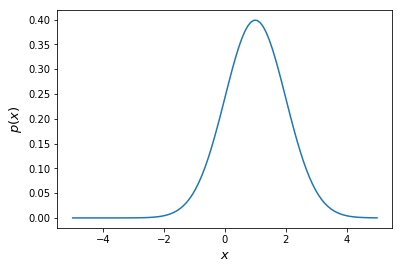

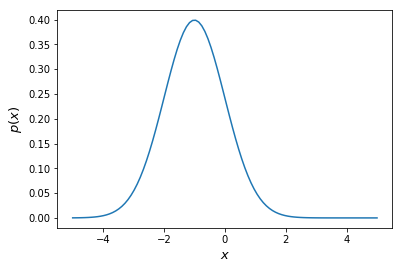

In [657]:
plot_1d_normal(mu_1_marginal,var_1_marginal,univariate_normal)
plot_1d_normal(mu_2_marginal,var_2_marginal,univariate_normal)

### 1.3 One way to view a gaussian distribution in 2D is using contour plot. In the following figure, we can see the contour plots of distributions with covariance and mean written below. Please complete the following cell and match the figures with correct values.

<img src="h.png">

In [658]:
a1, b1, c1 = 1 , -1 , 3
a2 , b2 , c2 = 1, -1.5 , 3
cov1 = np.array([[a1,b1],[b1,c1]])
cov2 = np.array([[a2,b2],[b2,c2]])

In [659]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = cov1
Sigma2 = cov2

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N


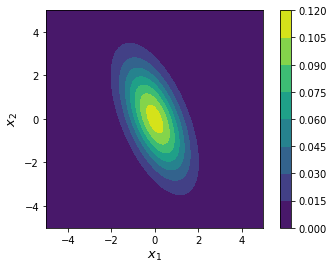

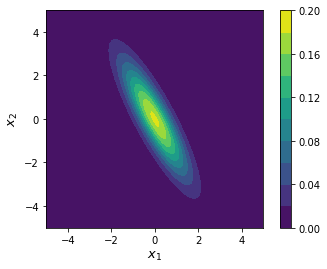

In [660]:
plot_2d_normal(np.array([0., 0.]),cov1,multivariate_gaussian)
plot_2d_normal(np.array([0., 0.]),cov2,multivariate_gaussian)

Covariance matrices:

1. $ \Big( \begin{bmatrix}
1 & 0.8 \\
0.8 & 1 
\end{bmatrix}\Big) $
2. $ \Big( \begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\Big) $
3. $ \Big( \begin{bmatrix}
1 & 0.8 \\
0.8 & 3 
\end{bmatrix}\Big) $
4. $ \Big( \begin{bmatrix}
1 & 0 \\
0 & 3.5 
\end{bmatrix}\Big) $
5. $ \Big( \begin{bmatrix}
3 & 0.8 \\
0.8 & 1 
\end{bmatrix}\Big) $
6. $ \Big( \begin{bmatrix}
1 & -1 \\
-1 & 3 
\end{bmatrix}\Big) $
7. $ \Big( \begin{bmatrix}
3 & -1 \\
-1 & 1 
\end{bmatrix}\Big) $
8. $ \Big( \begin{bmatrix}
1 & -1.5 \\
-1.5 & 3 
\end{bmatrix}\Big) $


which image corresponds to which covariance matrix? (hint: use the function implemented above to visualize the different multivariate distributions):

1 - f

2 - a

3 - h

4 - b

5 - g

6 - d

7 - c

8 - e


## Exercise 2 --  EMD and KL Divergence (2 Points)


- Suppose we have two discrete distributions $P$ and $Q$ with the following probability mass functions:

In [441]:
P = np.array([4,2,1,5,8,2,3,1,2,2])/30.
Q = np.array([1,8,3,6,4,2,1,3,1,1])/30.

#### 2.1 write the functions `EMD` and `KL_div` which receive as input two discrete distributions and compute the EMD and the KL divergence between the two (see course slides).

In [442]:
#KL Divergence implementation
def KL_div(P, Q):
    #source: https://gist.github.com/swayson/86c296aa354a555536e6765bbe726ff7
    kl_div = np.sum(np.where(P != 0, P * np.log(P / Q), 0))
    
    # kl_div =np.sum(P*np.log(P/Q))
    return kl_div 

In [683]:
#EMD implementation
def emd(P,Q):
    
    #applied from lecture slides
    M = np.append(np.array([0]),P-Q)
    for i in range(1,len(M)):
        M[i]=M[i]+M[i-1]
    
    emd_dis= np.sum(np.absolute(M))
    
        
    return emd_dis

In [684]:
print(emd(P,Q))

0.8000000000000002


In [685]:
print(scipy.stats.wasserstein_distance(P,Q))

0.013333333333333334


In [686]:
print(KL_div(P,Q))

0.37591197978858204


In [687]:
print(scipy.stats.entropy(P,Q))

0.3759119797885823


### Exercise 3 -- t-student test (4 points)

Assume you obtain three different samples coming from three normal distributions:

$P_a \sim X_a, P_b \sim X_b,P_c \sim X_c$.


We will perform a two-sample test to compare if the mean between pairs of samples is the same or not. This can be done with the $t$ statistic. We further more assume we have the same number of samples from each sample $N= N_a = N_b = N_c$:

$ t = \dfrac{\bar{x_a} - \bar{x_a}}
          {s\sqrt{\dfrac{2}{N}}} $

where the $s = \sqrt{\dfrac{(N-1)({s_a}^2 + {s_b}^2)}{2N-2}}$ and $s_a$ and $s_b$ are the sample variances.

Our goal is to use this test to see in which of the following cases we can identify wheter 2 samples have the same mean or not.


#### 3.1. write down the null-hypothesis that we assume to use the t-statistic (1 point)

H0 = mean_1 == mean_2

we will rely on the `np.random.normal` function to create a function that returns $N$ samples given a $\mu$ and $\sigma$. 

In [692]:
def get_samples(N):
    X1 = np.random.normal(1,1,N)
    X2 = np.random.normal(1.25,1,N)
    X3 = np.random.normal(2.,1,N)
    
    return (X1,X2,X3)

In [693]:
Xa, Xb, Xc = get_samples(N=10)

#### 3.2 Complete the `compute_t_statistic` function:

In [694]:
def compute_t_statistic(x1,x2):
    
    n = x1.shape[0]
    assert x1.shape[0] == x2.shape[0]
    # compute sample mean and variances

    # source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
    mean_1 , mean_2 = np.mean(x1) , np.mean(x2)
    se1, se2 = scipy.stats.sem(x1), scipy.stats.sem(x2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    t = (mean_1 - mean_2) / sed
    
    # this code below does same calculation according to the formula from above and it gives constantly huge differences
    # compared to the results of function scipy.stats.ttest_ind()
    #var_1 = scipy.stats.sem(x1)
    #var_2 = scipy.stats.sem(x2)
    #N_1 = len(x1)
    #N_2 = len(x2)
    #N = N_1 + N_2 - 2
    #sig = np.sqrt(((N_1-1)*(var_1**2) + (N_2-1)*(var_2**2))/N)
    #t = (mean_1-mean_2)/(sig*np.sqrt(1/N_1 + 1/N_2))
    
    return t
    

In [695]:
def t_test_means(X1,X2):
    # source: https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
    t = compute_t_statistic(X1,X2)
    p = 1 - scipy.stats.t.cdf(np.abs(t),len(X1)+len(X2)-2) # p-value --- yout might want to use scipy.stats.t, and remember to take into account both tails...
    
    return t, p*2


Now we can use `t_test_means` to compute the comparison between each pair: 

A vs B, A vs C, B vs C

In [696]:
t, p = t_test_means(Xb,Xa)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -1.691, p-value:0.11 


In [697]:
t, p = t_test_means(Xa,Xc)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -0.696, p-value:0.5 


In [698]:
t, p = t_test_means(Xb,Xc)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -2.086, p-value:0.051 


In [699]:
## you can check the results of your implemenetation with the following scipy function
t, p = scipy.stats.ttest_ind(Xb,Xc)
print(f't-statistic: {t:.3f}, p-value:{p:.2} ')

t-statistic: -2.086, p-value:0.051 


#### 3.3 Now test different sample sizes and see how many samples do we need for the test to distinguish between the different pairs? which one is the easiest to distinguish? which the hardest? 
hint: use the plot to support your analysis

In [674]:
#### Answer: A-B is the hardest and A-C the easiest because in A-B we generally need more samples to have a smaller p-value 
#compared to the rest

In [700]:
n_list = [1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4,1e5,5e5,1e6]
results = np.ones((3,len(n_list)))

for id_, n in enumerate(n_list):
    n = int(n)
    Xa, Xb, Xc = get_samples(N=n)
    
    _, p = t_test_means(Xa,Xb)
    results[0,id_] = p
    
    _, p = t_test_means(Xa,Xc)
    results[1,id_] = p
    _, p = t_test_means(Xc,Xb)
    results[2,id_] = p


Text(0,0.5,'p-value')

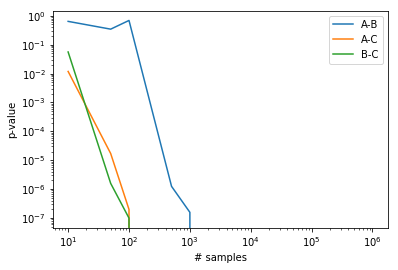

In [701]:
fig, ax = plt.subplots()
#log_p_values = np.log(results+1e-12)
log_p_values = results
ax.plot(n_list,log_p_values[0], label='A-B')
ax.plot(n_list,log_p_values[1], label='A-C')
ax.plot(n_list,log_p_values[2], label='B-C')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax.set_xlabel("# samples")
ax.set_ylabel("p-value")

In [ ]:
#### Answer: A-B is the hardest and A-C the easiest because in A-B we generally need more samples to have a smaller p-value 
#compared to the rest